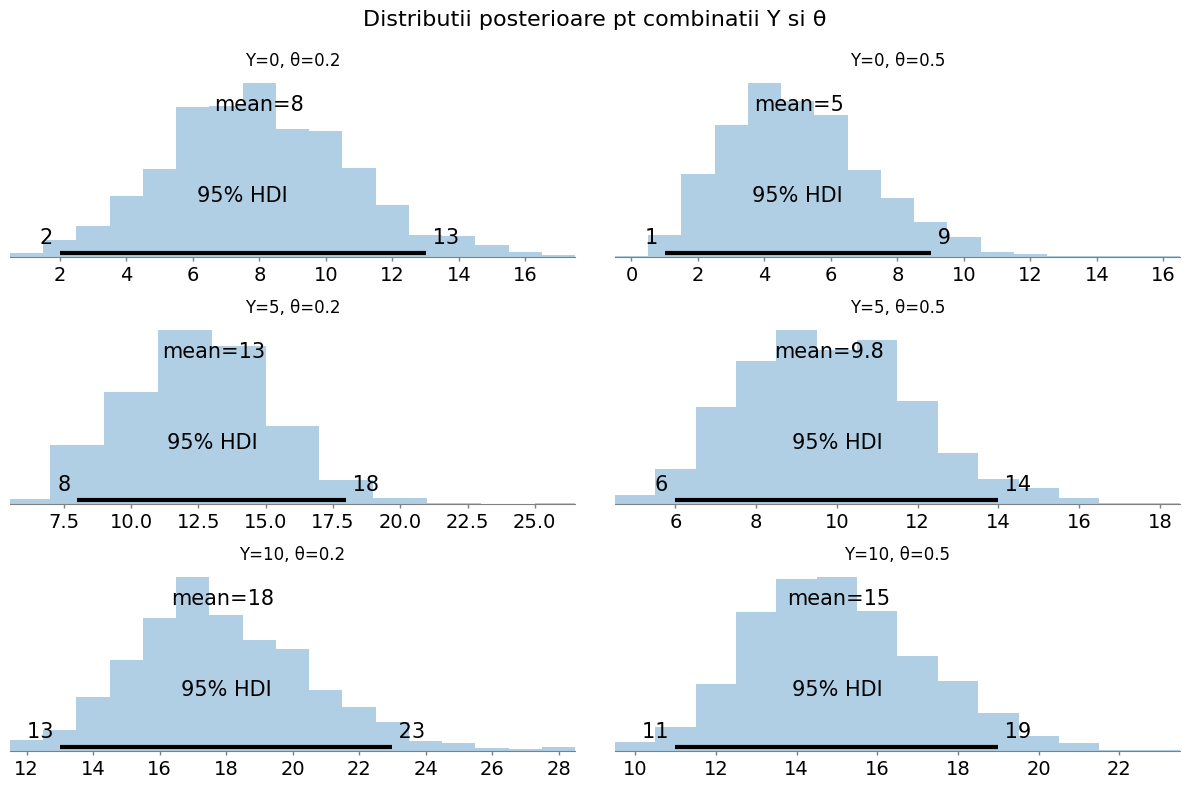

In [3]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

Y_values = [0, 5, 10]
theta_values = [0.2, 0.5]

fig, axes = plt.subplots(len(Y_values), len(theta_values), figsize=(12, 8))
fig.suptitle("Distributii posterioare pt combinatii Y si θ", fontsize=16)

for i, Y_obs in enumerate(Y_values):
    for j, theta_obs in enumerate(theta_values):
        with pm.Model() as model:

            n = pm.Poisson("n", mu=10)

            Y = pm.Binomial("Y", n=n, p=theta_obs, observed=Y_obs)

            trace = pm.sample(1000, tune=1000, return_inferencedata=True, chains=2, progressbar=False)

        az.plot_posterior(trace, var_names=["n"], ax=axes[i, j], hdi_prob=0.95)
        axes[i, j].set_title(f"Y={Y_obs}, θ={theta_obs}")

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()